<a href="https://colab.research.google.com/github/ShaneGuther/Abalon-Dataset-Regression/blob/main/guthers_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
#Final project - AI - INFO 40975
!pip install pycaret
##Shane Guther 
#Student Num: 991529673
#Abalone (Regression - Age (Rings + 1.5))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [153]:
#getting abalone dataset from folder
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names

import pandas as pd
df_aba_1 = pd.read_csv('abalone.data', names=['Sex','Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])
#df_aba_1['Age'] = df_aba_1['Rings'] + 1.5
#df_aba_1['Age'] = df_aba_1['Age'].astype(float)

df_aba = df_aba_1

In [154]:
data = df_aba.sample(frac=0.9, random_state=786)
data_unseen = df_aba.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (3759, 9)
Unseen Data For Predictions: (418, 9)


In [155]:

from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Rings', session_id=123)

,Description,Value
0,session_id,123
1,Target,Rings
2,Original Data,"(3759, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2631, 10)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Rings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [156]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,1.5672,4.7734,2.1816,0.5344,0.1792,0.1581,0.018
lr,Linear Regression,1.5675,4.7756,2.1821,0.5340,0.1792,0.1582,0.302
lar,Least Angle Regression,1.5674,4.7754,2.1821,0.5340,0.1792,0.1581,0.017
gbr,Gradient Boosting Regressor,1.5275,4.7939,2.1861,0.5340,0.1755,0.1521,0.320
rf,Random Forest Regressor,1.5457,4.7909,2.1862,0.5337,0.1756,0.1538,1.146
ridge,Ridge Regression,1.5743,4.8309,2.1946,0.5302,0.1834,0.1593,0.015
et,Extra Trees Regressor,1.5624,4.8663,2.2031,0.5264,0.1767,0.1554,0.747
huber,Huber Regressor,1.5379,4.8870,2.2071,0.5247,0.1790,0.1500,0.071
lightgbm,Light Gradient Boosting Machine,1.5524,4.9304,2.2176,0.5188,0.1777,0.1539,0.159
knn,K Neighbors Regressor,1.5800,5.1345,2.2607,0.5035,0.1814,0.1549,0.064


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
INFO:logs:compare_models() succesfully completed......................................


In [157]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [158]:
br = create_model('br')
dt = create_model('dt')
en = create_model('en')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0049,7.6676,2.7690,0.0917,0.2462,0.2193
1,2.4211,11.0668,3.3267,0.0840,0.3089,0.2948
2,2.3234,10.5796,3.2526,0.0819,0.2756,0.2526
3,2.2625,8.9157,2.9859,0.0936,0.2789,0.2670
4,2.1269,8.2696,2.8757,0.0926,0.2525,0.2287
5,2.1428,8.4574,2.9082,0.0958,0.2557,0.2348
6,2.3215,10.8109,3.2880,0.0694,0.2835,0.2510
7,2.0967,8.2891,2.8791,0.0914,0.2645,0.2431
8,2.3767,10.9137,3.3036,0.0856,0.3071,0.2975


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 5
INFO:logs:ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [159]:
tuned_br = tune_model(br)
tuned_dt = tune_model(dt)
tuned_en = tune_model(en)
#lgbm_params = {'num_leaves': np.arange(10,200,10), 'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)], 'learning_rate': np.arange(0.1,1,0.1)}
#tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

#tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9295,7.0484,2.6549,0.1651,0.2341,0.2089
1,2.3031,10.1747,3.1898,0.1579,0.2943,0.2772
2,2.2132,9.8129,3.1325,0.1485,0.2625,0.2381
3,2.1450,8.0968,2.8455,0.1768,0.2639,0.2502
4,2.0193,7.5818,2.7535,0.1681,0.2398,0.2151
5,2.0311,7.7140,2.7774,0.1753,0.2420,0.2204
6,2.2169,9.9614,3.1562,0.1425,0.2697,0.2370
7,2.0114,7.5722,2.7518,0.1700,0.2506,0.2299
8,2.2492,9.9600,3.1559,0.1655,0.2912,0.2779


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 8
INFO:logs:ElasticNet(alpha=0.71, copy_X=True, fit_intercept=True, l1_ratio=0.344,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


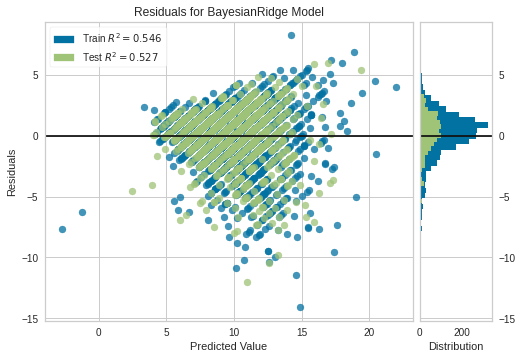

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [160]:
plot_model(tuned_br)

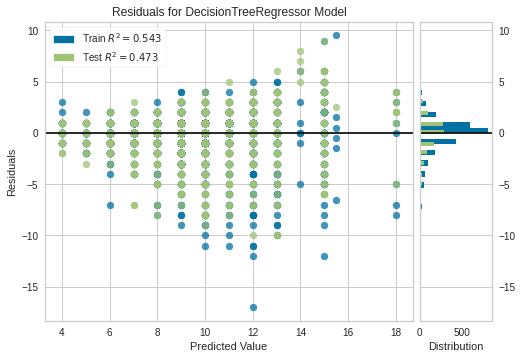

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [161]:
plot_model(tuned_dt)

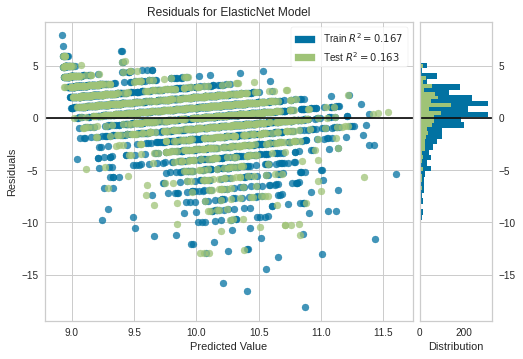

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [162]:
plot_model(tuned_en)

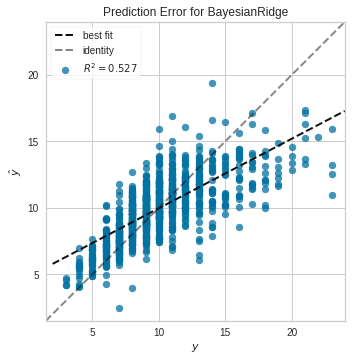

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [163]:
plot_model(tuned_br, plot = 'error')

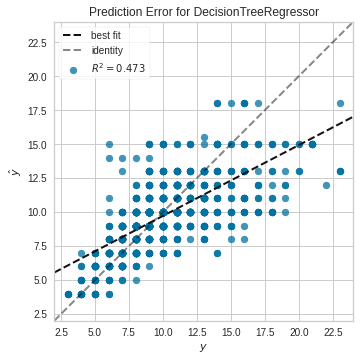

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [164]:
plot_model(tuned_dt, plot = 'error')

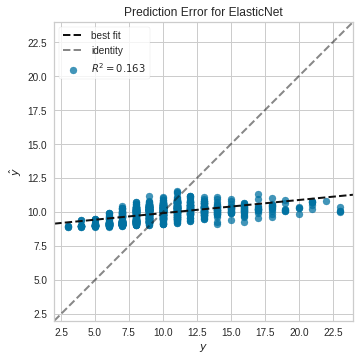

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [165]:
plot_model(tuned_en, plot = 'error')

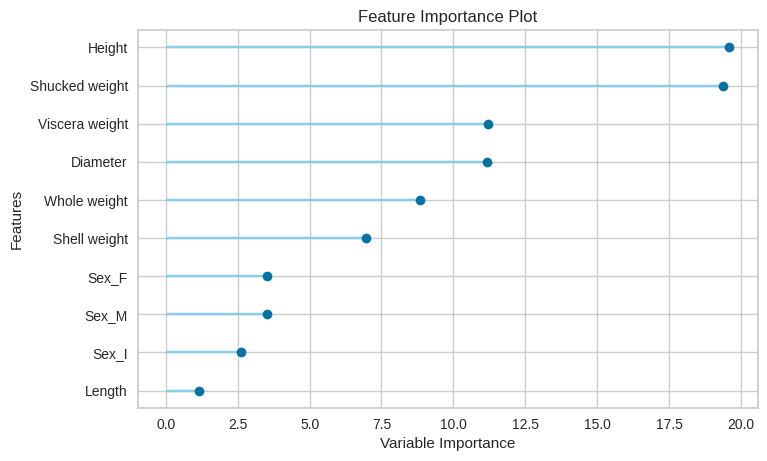

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [166]:
plot_model(tuned_br, plot='feature')

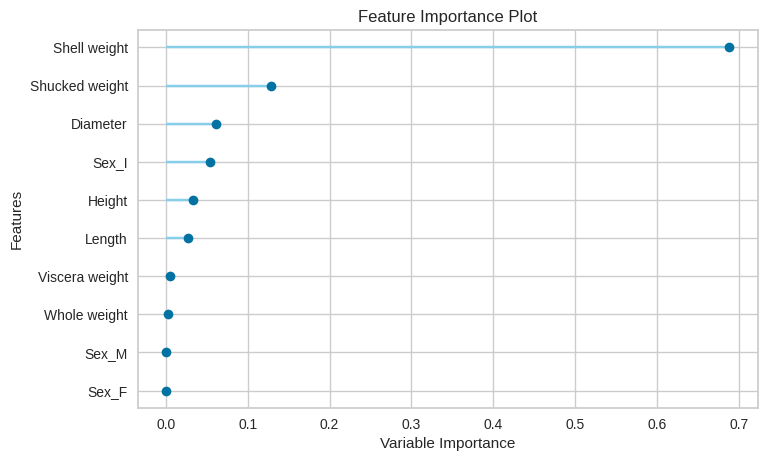

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [167]:
plot_model(tuned_dt, plot='feature')

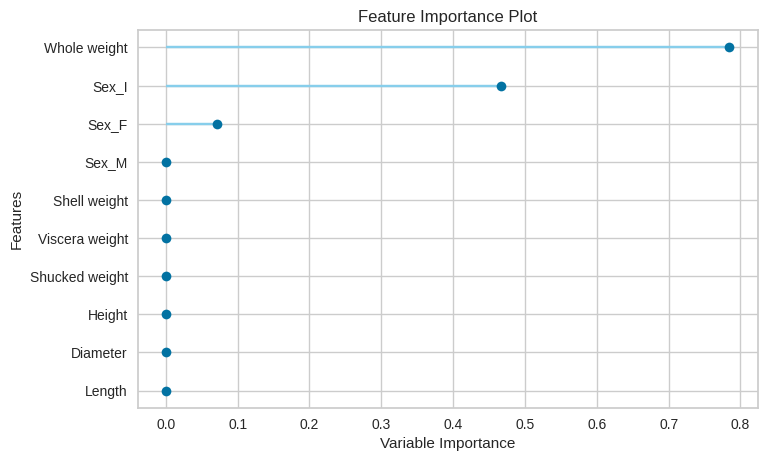

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [168]:
plot_model(tuned_en, plot='feature')

In [169]:
evaluate_model(tuned_br)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=BayesianRidge(alpha_1=0.01, alpha_2=0.1, alpha_init=None, compute_score=False,
              copy_X=True, fit_intercept=False, lambda_1=0.2, lambda_2=0.1,
              lambda_init=None, n_iter=300, normalize=True, tol=0.001,
              verbose=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [170]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [171]:
evaluate_model(tuned_en)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ElasticNet(alpha=0.71, copy_X=True, fit_intercept=True, l1_ratio=0.344,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [172]:
predict_model(tuned_br);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=BayesianRidge(alpha_1=0.01, alpha_2=0.1, alpha_init=None, compute_score=False,
              copy_X=True, fit_intercept=False, lambda_1=0.2, lambda_2=0.1,
              lambda_init=None, n_iter=300, normalize=True, tol=0.001,
              verbose=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,1.5757,4.6931,2.1664,0.5269,0.1817,0.159


In [173]:
predict_model(tuned_dt);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best'), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,1.5421,5.2281,2.2865,0.4729,0.1871,0.1502


In [174]:
predict_model(tuned_en);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ElasticNet(alpha=0.71, copy_X=True, fit_intercept=True, l1_ratio=0.344,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,2.1129,8.3018,2.8813,0.1631,0.2561,0.2343


In [175]:
final_br = finalize_model(tuned_br)
final_dt = finalize_model(tuned_dt)
final_en = finalize_model(tuned_en)
print(final_br)
print(final_dt)
print(final_en)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=BayesianRidge(alpha_1=0.01, alpha_2=0.1, alpha_init=None, compute_score=False,
              copy_X=True, fit_intercept=False, lambda_1=0.2, lambda_2=0.1,
              lambda_init=None, n_iter=300, normalize=True, tol=0.001,
              verbose=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing BayesianRidge(alpha_1=0.01, alpha_2=0.1, alpha_init=None, compute_score=False,
              copy_X=True, fit_intercept=False, lambda_1=0.2, lambda_2=0.1,
              lambda_init=None, n_iter=300, normalize=True, tol=0.001,
              verbose=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=BayesianRidge(alpha_1=0.01, alpha_2=0.1, alpha_init=None, compute_score=False,
              copy_X=True, fit_intercept=False, lambda_1=0.2, lambda_2=0.1,
              lambda_init=None, n_iter=300, normali

BayesianRidge(alpha_1=0.01, alpha_2=0.1, alpha_init=None, compute_score=False,
              copy_X=True, fit_intercept=False, lambda_1=0.2, lambda_2=0.1,
              lambda_init=None, n_iter=300, normalize=True, tol=0.001,
              verbose=False)
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
ElasticNet(alpha=0.71, copy_X=True, fit_intercept=True, l1_ratio=0.344,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False)


In [176]:
predict_model(final_br);
predict_model(final_dt);
predict_model(final_en);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=BayesianRidge(alpha_1=0.01, alpha_2=0.1, alpha_init=None, compute_score=False,
              copy_X=True, fit_intercept=False, lambda_1=0.2, lambda_2=0.1,
              lambda_init=None, n_iter=300, normalize=True, tol=0.001,
              verbose=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,1.5675,4.653,2.1571,0.5309,0.1806,0.1583


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best'), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,1.3896,4.7254,2.1738,0.5236,0.1751,0.1329


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ElasticNet(alpha=0.71, copy_X=True, fit_intercept=True, l1_ratio=0.344,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,2.1164,8.3348,2.887,0.1597,0.2566,0.2346


In [177]:
unseen_predictions_br = predict_model(final_br, data=data_unseen)
unseen_predictions_br.head()

unseen_predictions_dt = predict_model(final_dt, data=data_unseen)
unseen_predictions_dt.head()

unseen_predictions_en = predict_model(final_en, data=data_unseen)
unseen_predictions_en.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=BayesianRidge(alpha_1=0.01, alpha_2=0.1, alpha_init=None, compute_score=False,
              copy_X=True, fit_intercept=False, lambda_1=0.2, lambda_2=0.1,
              lambda_init=None, n_iter=300, normalize=True, tol=0.001,
              verbose=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,1.7024,6.204,2.4908,0.4698,0.1923,0.1656


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best'), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,1.6029,6.6711,2.5828,0.4299,0.197,0.1438


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ElasticNet(alpha=0.71, copy_X=True, fit_intercept=True, l1_ratio=0.344,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,2.248,10.1322,3.1831,0.1341,0.2662,0.2318


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Label
0,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.204514
1,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,9.712419
2,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.205,10,9.980029
3,M,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,7,9.597695
4,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.200,9,10.040250


In [178]:
from pycaret.utils import check_metric
check_metric(unseen_predictions_br.Rings, unseen_predictions_br.Label, 'MSE')
check_metric(unseen_predictions_dt.Rings, unseen_predictions_dt.Label, 'MSE')
check_metric(unseen_predictions_en.Rings, unseen_predictions_en.Label, 'MSE')

10.1322

In [179]:
save_model(final_br,'Final br Model 28Nov2022')
save_model(final_dt,'Final dt Model 28Nov2022')
save_model(final_en,'Final en Model 28Nov2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=BayesianRidge(alpha_1=0.01, alpha_2=0.1, alpha_init=None, compute_score=False,
              copy_X=True, fit_intercept=False, lambda_1=0.2, lambda_2=0.1,
              lambda_init=None, n_iter=300, normalize=True, tol=0.001,
              verbose=False), model_name=Final br Model 28Nov2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Rings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
            

Transformation Pipeline and Model Successfully Saved


INFO:logs:Final dt Model 28Nov2022.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Rings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae',
                                       max_depth=6, max_features=1.0,
  

Transformation Pipeline and Model Successfully Saved


INFO:logs:Final en Model 28Nov2022.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Rings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
        

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Rings',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  ElasticNet(alpha=0.71, copy_X=True, fit_intercept=True,
  

In [180]:
saved_final_br = load_model('Final br Model 28Nov2022')
saved_final_dt = load_model('Final dt Model 28Nov2022')
saved_final_en = load_model('Final en Model 28Nov2022')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final br Model 28Nov2022, platform=None, authentication=None, verbose=True)
INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final dt Model 28Nov2022, platform=None, authentication=None, verbose=True)
INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final en Model 28Nov2022, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [181]:
new_prediction_br = predict_model(saved_final_br, data=data_unseen)
new_prediction_dt = predict_model(saved_final_dt, data=data_unseen)
new_prediction_en = predict_model(saved_final_en, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Rings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 Ba

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,1.7024,6.204,2.4908,0.4698,0.1923,0.1656


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Rings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae',
                                       max_depth=6, max_features=1.0,
             

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,1.6029,6.6711,2.5828,0.4299,0.197,0.1438


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Rings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 El

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,2.248,10.1322,3.1831,0.1341,0.2662,0.2318


In [182]:
new_prediction_br.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Label
0,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,7.734609
1,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,9.395476
2,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.205,10,10.541609
3,M,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,7,8.507251
4,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.200,9,9.776388


In [183]:
new_prediction_dt.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Label
0,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,8.0
1,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,9.0
2,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.205,10,11.0
3,M,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,7,9.0
4,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.200,9,9.0


In [184]:
new_prediction_en.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Label
0,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.204514
1,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,9.712419
2,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.205,10,9.980029
3,M,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,7,9.597695
4,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.200,9,10.040250


In [185]:
#new_prediction['Label'] = new_prediction['Label']
new_prediction_br['Exact Age'] = new_prediction_br['Rings'] + 1.5
new_prediction_br['Age'] = new_prediction_br['Label'] + 1.5

new_prediction_br.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Label,Exact Age,Age
0,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,7.734609,9.5,9.234609
1,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,9.395476,11.5,10.895476
2,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.205,10,10.541609,11.5,12.041609
3,M,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,7,8.507251,8.5,10.007251
4,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.200,9,9.776388,10.5,11.276388


In [186]:
#new_prediction['Label'] = new_prediction['Label']
new_prediction_dt['Exact Age'] = new_prediction_dt['Rings'] + 1.5
new_prediction_dt['Age'] = new_prediction_dt['Label'] + 1.5

new_prediction_dt.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Label,Exact Age,Age
0,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,8.0,9.5,9.5
1,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,9.0,11.5,10.5
2,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.205,10,11.0,11.5,12.5
3,M,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,7,9.0,8.5,10.5
4,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.200,9,9.0,10.5,10.5


In [187]:
#new_prediction['Label'] = new_prediction['Label']
new_prediction_en['Exact Age'] = new_prediction_en['Rings'] + 1.5
new_prediction_en['Age'] = new_prediction_en['Label'] + 1.5

new_prediction_en.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Label,Exact Age,Age
0,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.204514,9.5,10.704514
1,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,9.712419,11.5,11.212419
2,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.205,10,9.980029,11.5,11.480029
3,M,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,7,9.597695,8.5,11.097695
4,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.200,9,10.040250,10.5,11.540250


In [188]:
from pycaret.utils import check_metric
check_metric(new_prediction_br.Rings, new_prediction_br.Label, 'RMSLE')

0.1923

In [189]:
from pycaret.utils import check_metric
check_metric(new_prediction_dt.Rings, new_prediction_dt.Label, 'RMSLE')

0.197

In [190]:
from pycaret.utils import check_metric
check_metric(new_prediction_en.Rings, new_prediction_en.Label, 'RMSLE')

0.2662